In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
synth = pd.read_csv('bbox_data/synth_bbox_areas_vs_scale.txt', header=None)
synth.rename(columns={0 : 'scale', 1 : 'area'}, inplace=True)
real = pd.read_csv('bbox_data/real_bboxes_sizes.txt', header=None)
print(real.tail())
# cut outliers
real = real[:-5]

          0
1589  10324
1590  11094
1591  11094
1592  12056
1593  13455


In [3]:
area_dist = real.to_numpy()

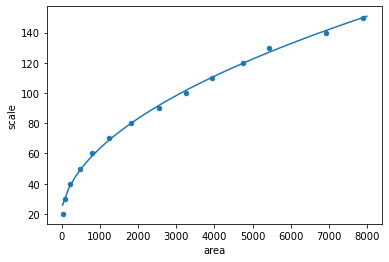

In [4]:
synth_means = synth.groupby(['scale'], group_keys=False).mean().reset_index()
p = np.polyfit(synth_means['scale'], synth_means['area'], 2)


def inverse_square(y, a, b, c):
    # ax^2 + bx + c = y
    # ax^2 + bx + c - y = 0
    return (-b + np.sqrt(b ** 2 - 4 * a * (c-y))) / (2 * a)
  
xvals = np.linspace(20, 8000)
yvals = inverse_square(xvals, *p)
synth_means.plot(x='area', y='scale', kind='scatter')
plt.plot(xvals, yvals)
plt.show()

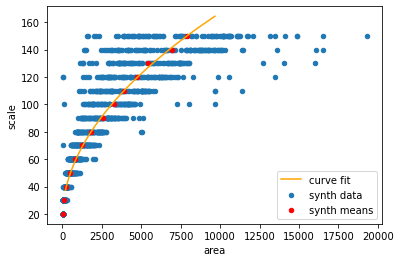

In [5]:
ax = synth.plot(x='area', y='scale', kind='scatter', label='synth data')
plt.plot(real, inverse_square(real, *p), color='orange', label='curve fit')
# plt.plot(real, inverse_square(real, *p), '.', label = 'real data')
synth_means.plot(x='area', y='scale', kind='scatter', color='red', ax=ax, label='synth means')
plt.legend()
plt.show()

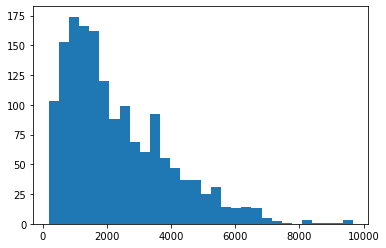

In [6]:
plt.hist(area_dist, bins=30)
plt.show()

In [7]:
arr_split = np.array_split(area_dist, 20)
bins = [a[0][0] for a in arr_split] + [arr_split[-1][-1][-1]]

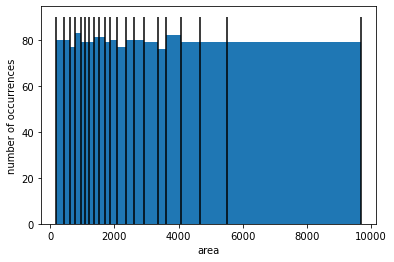

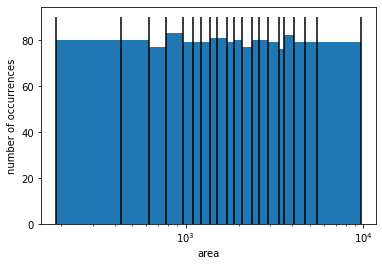

In [8]:
for xscale_type in ['linear', 'log']:
    plt.figure()
    plt.hist(area_dist, bins=bins)
    plt.vlines(bins, 0, 90)
    plt.xscale(xscale_type)
    plt.xlabel('area')
    plt.ylabel('number of occurrences')
    plt.show()

In [9]:
scale_bins = inverse_square(bins, *p)
np.savetxt('bbox_data/scale_bins.csv', scale_bins, header='scale', fmt='%.4e')

## SW Bounding Boxes

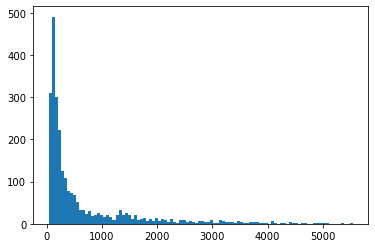

In [17]:
sw_real = pd.read_csv('bbox_data/bboxes_sizes_SW.txt', header=None)
plt.hist(sw_real.to_numpy(), bins=100)
plt.show()

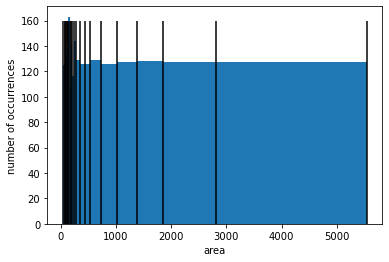

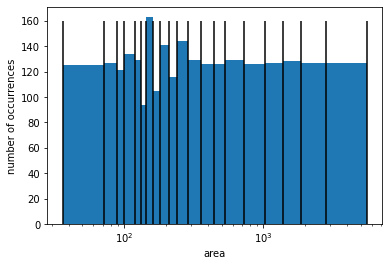

[ 27.37841551  30.30431885  31.44203069  32.24715639  33.51288913
  34.23313433  34.87085429  35.92743523  36.98573643  38.38828315
  39.80443975  41.91783333  44.58121918  47.73166752  50.79935991
  56.51091963  64.11990147  71.90790485  80.56825368  95.61301589
 128.13990106]


In [22]:
area_dist = sw_real.to_numpy()

arr_split = np.array_split(area_dist, 20)
bins = [a[0][0] for a in arr_split] + [arr_split[-1][-1][-1]]

for xscale_type in ['linear', 'log']:
    plt.figure()
    plt.hist(area_dist, bins=bins)
    plt.vlines(bins, 0, 160)
    plt.xscale(xscale_type)
    plt.xlabel('area')
    plt.ylabel('number of occurrences')
    plt.show()
    
scale_bins = inverse_square(bins, *p)
print(scale_bins)
np.savetxt('bbox_data/sw_scale_bins.csv', scale_bins, header='scale', fmt='%.4e')